## 키워드 검색 (search/news)

In [1]:
import requests
import json
import jsonlines
import re
import pandas as pd

NEWS_LIST_PAYLOAD= {
    "access_key": "fd419682-7b55-4253-b971-5be53df4742a",
    "argument": {
        "query": "서비스",
        "published_at": {
            "from": "2020-01-01",
            "until": "2021-01-31"
        },
        "provider": [ ],
        "category": ["정치"],
        "category_incident": [
            "범죄",
            "사고",
            "사회"
        ],
        "byline": "",
        "provider_subject": [
            "경제", "부동산"
        ],
        "sort": {"date": "desc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 100,
        "fields": [
            "byline",
            "category",
            "category_incident",
            "provider_news_id"
        ]
    }
}

NEWS_LIST_HEADERS = {'Content-Type': 'application/json'}
NEWS_URL = r"http://tools.kinds.or.kr:8888/search/news"

response = requests.request("POST", NEWS_URL, headers=NEWS_LIST_HEADERS, data = json.dumps(NEWS_LIST_PAYLOAD))

In [2]:
temp = response.json()
tlist = temp['return_object']['documents']

In [3]:
pd.json_normalize(tlist).iloc[:10]

,news_id,title,hilight,published_at,enveloped_at,dateline,provider,category,category_incident,byline,provider_news_id
0,02100311.20210125173530001,"""美 '동맹국 연대'로 中 전방위 압박…CPTPP 가입 서둘러야""","""美 ..'동맹국 연대'로 中 전방위 압박…CPTPP 가입 서둘러야"" ..“모든 미...",2021-01-25T00:00:00.000+09:00,2021-01-25T17:35:30.000+09:00,2021-01-25T23:25:34.000+09:00,서울경제,"[경제>무역, 국제>미국_북미, 정치>정치일반]",[범죄>기업범죄>거래제한],김우보 기자,22HE72FMLT
1,01601101.20201231162754002,"[인터뷰] 김용진 국민연금공단 이사장 ""국민연금 존재 이유는 국민 행복""","[인터뷰] 김용진 국민연금공단 이사장 ..""국민연금 존재 이유는 국민 행복"" 새해를...",2020-12-31T00:00:00.000+09:00,2020-12-31T16:27:54.000+09:00,2021-07-14T17:42:53.000+09:00,전북일보,"[정치>행정_자치, 경제>금융_재테크]","[범죄>범죄일반>절도, 범죄>범죄일반>마약]",강인,2099363
2,01400501.20201227174017001,인천공항공사 사장에 김경욱 전 국토부 차관 유력,인천공항공사 사장에 김경욱 전 국토부 차관 유력 김경욱 전 국토교통부 제2차관......,2020-12-27T00:00:00.000+09:00,2020-12-27T17:40:17.000+09:00,2020-12-27T17:40:17.000+09:00,중부일보,"[정치>행정_자치, 정치>청와대]",[사고>산업사고>화재],유정희,363464174
3,02100311.20201225110056001,"[국정농담] '文지지율 꼴찌' 20대, 임대주택 준다고 돌아설까","[국정농담] ..'文지지율 꼴찌' 20대, 임대주택 준다고 돌아설까 최악의 취업난에...",2020-12-25T00:00:00.000+09:00,2020-12-25T11:00:56.000+09:00,2020-12-26T14:22:47.000+09:00,서울경제,[정치>청와대],[사회>사회문제>빈곤],윤경환 기자,1ZBTJTOI07
4,01601001.20201223195309002,‘비위 행위 무관용 원칙’국민연금공단 공직윤리 쇄신안 발표,‘비위 행위 무관용 원칙’국민연금공단 공직윤리 쇄신안 발표 .. 국민연금공단이 공단...,2020-12-23T00:00:00.000+09:00,2020-12-23T19:53:09.000+09:00,2020-12-23T19:53:09.000+09:00,전북도민일보,"[경제>경제일반, 정치>정치일반, 사회>사회일반]","[범죄>기업범죄>횡령, 범죄>정치>뇌물수수, 범죄>범죄일반>절도, 범죄>범죄일반>마약]",김기주 기자,1322506
5,01100611.20201218111252001,‘인구 2억 7000만명 거대시장 열렸다’…한·인니 ‘포괄적 경제 동반자협정’ 최종 서명,인도네시아 <b>서비스</b> 시장에 진출할 기회도 확대됐다... 온라인게임·유통·...,2020-12-18T00:00:00.000+09:00,2020-12-18T11:12:52.000+09:00,2020-12-18T11:07:00.000+09:00,서울신문,"[경제>무역, 경제>자동차, 정치>정치일반]",[범죄>기업범죄>거래제한],김승훈,01100611.20201218500065
6,01100201.20201116162548001,"“노동부장관님, 겁이 납니다” 16년차 택배기사의 호소","“노동부장관님, 겁이 납니다” 16년차 택배기사의 호소 정부가 코로나 사태로 인한 ...",2020-11-16T00:00:00.000+09:00,2020-11-16T16:25:48.000+09:00,2020-11-16T16:24:44.000+09:00,국민일보,[정치>정치일반],[범죄>기업범죄>거래제한],박장군,0015222812
7,02100311.20201106084913001,"김용범 ""그린전환과 사회 안전망 구축 위해 노력하겠다""","김용범 ..""그린전환과 사회 안전망 구축 위해 노력하겠다"" 김용범 기획재정부 1차관...",2020-11-06T00:00:00.000+09:00,2020-11-06T08:49:13.000+09:00,2020-11-06T08:48:33.000+09:00,서울경제,"[경제>취업_창업, 정치>정치일반]",[사회>사회문제>빈곤],양철민 기자,1ZAAV7QLYD
8,01601101.20201014215408003,"‘대마초 흡연, 성비위 논란’ 도마 위…김용진 이사장 “연말 쇄신안 발표”","‘대마초 흡연, 성비위 논란’ 도마 위…김용진 이사장 ..“연말 쇄신안 발표” 국회...",2020-10-14T00:00:00.000+09:00,2020-10-14T21:54:08.000+09:00,2020-10-14T21:54:08.000+09:00,전북일보,"[정치>행정_자치, 정치>국회_정당]",[범죄>범죄일반>마약],김세희,2093654
9,02100851.20201012102825001,"[2020 국감] 국세청 ""반사회적 탈세·체납 엄단… 경제 위기 회복은 뒷받침""","[2020 국감] 국세청 ..""반사회적 탈세·체납 엄단… 경제 위기 회복은 뒷받침""...",2020-10-12T00:00:00.000+09:00,2020-10-12T10:28:25.000+09:00,2020-10-12T10:27:53.000+09:00,아주경제,"[경제>경제일반, 정치>정치일반]",[범죄>범죄일반>절도],최다현,20201012102119625


## 연관어분석

In [4]:
NEWS_LIST_PAYLOAD= {
    "access_key": "fd419682-7b55-4253-b971-5be53df4742a",
    "argument": {
        "query": "발언",
        "published_at": {
            "from": "2022-01-01",
            "until": "2022-08-23"
        },
        "provider": [  ],
        "category": [  ],
        "category_incident": ["사회",  "범죄"],
        "byline": "",
        "provider_subject": [ "사회", "경제", "정치"]
    }
}


NEWS_LIST_HEADERS = {'Content-Type': 'application/json'}
NEWS_URL = r"http://tools.kinds.or.kr:8888/word_cloud"

response = requests.request("POST", NEWS_URL, headers=NEWS_LIST_HEADERS, data = json.dumps(NEWS_LIST_PAYLOAD))

In [5]:
temp = response.json()
netlist = temp['return_object']['nodes']
netlist

[{'id': 2, 'name': '페이스북', 'level': 1, 'weight': 24.79},
 {'id': 3, 'name': '이준석 국민', 'level': 3, 'weight': 19.55},
 {'id': 4, 'name': '장애인', 'level': 3, 'weight': 16.72},
 {'id': 5, 'name': '전장연', 'level': 3, 'weight': 12.47},
 {'id': 6, 'name': '인권위', 'level': 3, 'weight': 8.95},
 {'id': 9, 'name': '피해자', 'level': 1, 'weight': 15.78},
 {'id': 10, 'name': '여성 보좌진', 'level': 3, 'weight': 12.48},
 {'id': 11, 'name': '온라인 회의', 'level': 3, 'weight': 12.32},
 {'id': 12, 'name': '최강욱 의원', 'level': 2, 'weight': 15.63},
 {'id': 13, 'name': '민주당 윤리심판원', 'level': 3, 'weight': 14.07},
 {'id': 14, 'name': '위원장', 'level': 3, 'weight': 14.02},
 {'id': 15, 'name': '민주당', 'level': 3, 'weight': 12.12},
 {'id': 16, 'name': '중징계', 'level': 3, 'weight': 10.94},
 {'id': 17, 'name': '최강욱 더불어민주당 의원', 'level': 2, 'weight': 10.58},
 {'id': 18, 'name': '이재명 후보', 'level': 2, 'weight': 9.55},
 {'id': 19, 'name': '윤석열 국민', 'level': 3, 'weight': 8.89},
 {'id': 20, 'name': '러시아', 'level': 3, 'weight': 5.68},
 {'id'

In [6]:
for i in netlist :
    i.pop('id', None)
    i.pop('level', None)
    i['subword'] = '발언'

In [7]:
df = pd.DataFrame(netlist)
df = df.set_index('subword')
df = df.reset_index()

In [8]:
df.columns = ['subword', 'supword', 'weight']
df.head()

,subword,supword,weight
0,발언,페이스북,24.79
1,발언,이준석 국민,19.55
2,발언,장애인,16.72
3,발언,전장연,12.47
4,발언,인권위,8.95


In [9]:
df.describe()

,weight
count,29.000000
mean,10.694828
std,4.614360
min,5.420000
25%,7.060000
50%,9.340000
75%,12.480000
max,24.790000


#### networkx 모듈
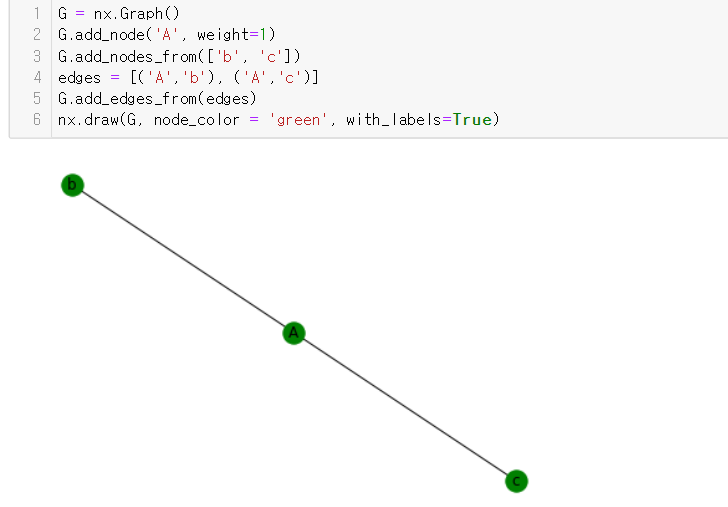

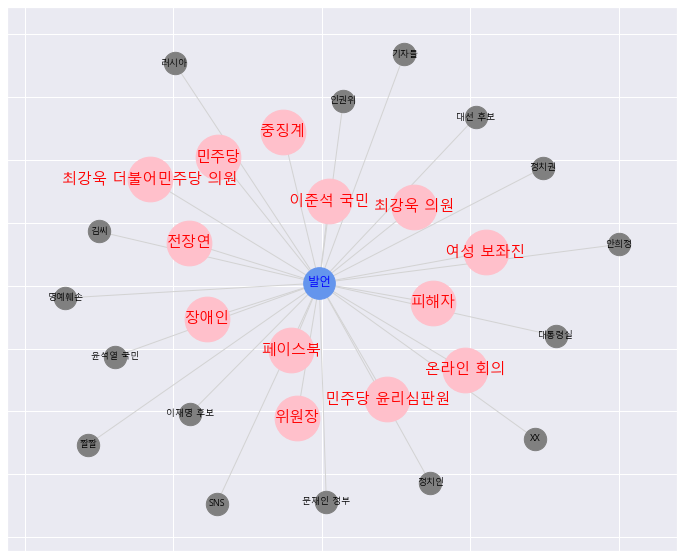

In [12]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' ## 한글 깨짐현상 해결'
plt.rc('axes', unicode_minus=False)
plt.rcParams["figure.figsize"] = (12, 10)    ## 기본 그래프 사이즈 설정
sns.set(style='darkgrid')  ## 그림 배경색 옵션


supword = list(df['supword'])
weight = list(df['weight'])

G = nx.Graph()
G.add_node('발언', weight=1)
edges = []

for i in range(df.shape[0]):
    G.add_node(supword[i], weight=weight[i]*3)
    G.add_edge('발언', supword[i], weight=weight[i])


## 네트워크 연결망 그래프
pos = nx.spring_layout(G)
highd, lowd = [], []

for n, w in G.nodes(data=True) :
    if w['weight'] > 30 :
        highd.append(n)
    else :
        lowd.append(n)

main = G.subgraph(lowd[0])
highsub= G.subgraph(highd)
lowsub = G.subgraph(lowd[1:])

nx.draw_networkx_nodes(main, pos=pos, node_size=1000, node_color='cornflowerblue')
nx.draw_networkx_labels(main, pos=pos, font_family='Malgun Gothic', font_size=12, font_color='blue')
nx.draw_networkx_nodes(highsub, pos=pos, node_size=2000, node_color='pink')
nx.draw_networkx_labels(highsub, pos=pos, font_family='Malgun Gothic', font_size=15, font_color='red')
nx.draw_networkx_nodes(lowsub, pos=pos, node_size=500, node_color='grey')
nx.draw_networkx_labels(lowsub, pos=pos, font_family='Malgun Gothic', font_size=9, font_color='black')
nx.draw_networkx_edges(G, pos=pos, edge_color='lightgrey')